In [1]:
%matplotlib inline

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import xmltodict
import requests
import json
import pprint
import collections

In [198]:
response = requests.get('https://www.boardgamegeek.com/xmlapi2/hot?type=boardgame')
if response.status_code == 200:
    hot_parse = xmltodict.parse(response.text)
    hot_data = hot_parse['items']['item']
    
daHotness = []


for item in hot_data:
    daHotness.append({'ID': item['@id'], 'Rank':item['@rank'], 'Name': item['name']['@value'], 'Year_Released': item['yearpublished']['@value'],
                     'Thumbnail': item['thumbnail']['@value']})
    
hot_json_str = json.dumps(daHotness)

In [199]:
hot_dataframe = pd.read_json(hot_json_str)

In [200]:
hot_dataframe.head()

,ID,Rank,Name,Year_Released,Thumbnail
0,295770,1,Frosthaven,2021,https://cf.geekdo-images.com/thumb/img/P1hbRu9...
1,264220,2,Tainted Grail: The Fall of Avalon,2019,https://cf.geekdo-images.com/thumb/img/Zbr3ml_...
2,174430,3,Gloomhaven,2017,https://cf.geekdo-images.com/thumb/img/e7GyV4P...
3,167791,4,Terraforming Mars,2016,https://cf.geekdo-images.com/thumb/img/yFqQ569...
4,285774,5,Marvel Champions: The Card Game,2019,https://cf.geekdo-images.com/thumb/img/aiWh4Ib...


In [201]:
hot_dataframe.describe()

,ID,Rank,Year_Released
count,50.000000,50.00000,50.000000
mean,220029.920000,25.50000,2017.280000
std,58778.039235,14.57738,2.166913
min,55690.000000,1.00000,2010.000000
25%,180704.250000,13.25000,2016.000000
50%,234767.500000,25.50000,2018.000000
75%,266519.750000,37.75000,2019.000000
max,295770.000000,50.00000,2021.000000


In [202]:
bgg = pd.read_json(r'http://127.0.0.1:5000/api/v1/games')

In [203]:
bgg.head()

,_id,id,username,name,rating,minplayers,maxplayers,minplaytime,maxplaytime,yearpublished,ranking,numberowned,type
0,{'$oid': '5deeebff080400b768a28e7f'},0,Shawninator,5-Minute Dungeon,7.15458,2,5,5,30,2017,678,8915,boardgame
1,{'$oid': '5deeebff080400b768a28e80'},1,Shawninator,7 Wonders,7.76994,2,7,30,30,2010,48,96982,boardgame
2,{'$oid': '5deeebff080400b768a28e81'},2,Shawninator,BANG!,6.51924,4,7,20,40,2002,1176,28660,boardgame
3,{'$oid': '5deeebff080400b768a28e82'},3,Shawninator,BANG! The Dice Game,6.98036,3,8,15,15,2013,519,26591,boardgame
4,{'$oid': '5deeebff080400b768a28e83'},4,Shawninator,Betrayal at House on the Hill,7.07081,3,6,60,60,2004,480,50039,boardgame


In [204]:
bgg.loc[bgg.rating == max(bgg.rating)]

,_id,id,username,name,rating,minplayers,maxplayers,minplaytime,maxplaytime,yearpublished,ranking,numberowned,type
148,{'$oid': '5deeebff080400b768a28f13'},148,torisnow,Terraforming Mars,8.41542,1,5,120,120,2016,3,59898,boardgame


<function matplotlib.pyplot.show(*args, **kw)>

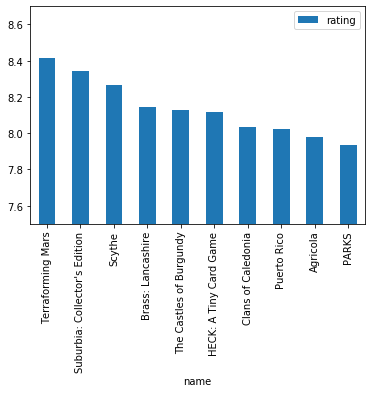

In [205]:
top = bgg.nlargest(10, ['rating'])
top.plot(kind='bar', x='name', y= 'rating')
plt.ylim((7.5,8.7))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

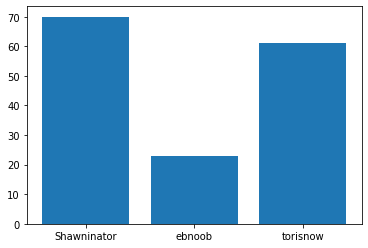

In [206]:
shawn = 0
emma = 0
tori = 0
for i in bgg.username:
    if i == 'Shawninator':
        shawn += 1
    if i == 'ebnoob':
        emma += 1
    if i == 'torisnow':
        tori += 1

user_dict = {'Shawninator': shawn, 'ebnoob': emma, 'torisnow': tori}

plt.bar(range(len(user_dict)),user_dict.values())
plt.xticks(range(len(user_dict)), list(user_dict.keys()))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

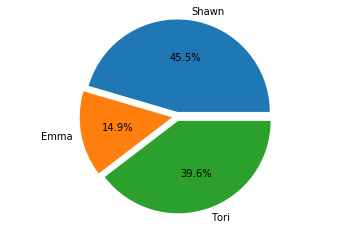

In [207]:
shawn = 0
emma = 0
tori = 0
for i in bgg.username:
    if i == 'Shawninator':
        shawn += 1
    if i == 'ebnoob':
        emma += 1
    if i == 'torisnow':
        tori += 1

user_dict = {'Shawn': shawn, 'Emma': emma, 'Tori': tori}
labels = user_dict.keys()
sizes = user_dict.values()
explode = (0.05,0.05,0.05)
plt.pie(sizes,labels=labels, explode=explode,autopct='%1.1f%%')
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

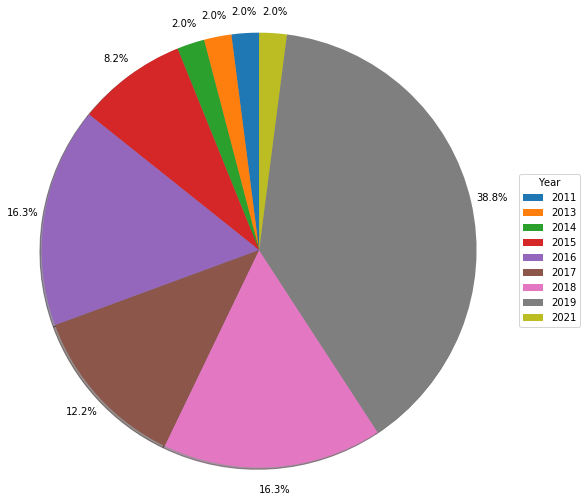

In [208]:
#2012 and 2020 don't have any games 
yr11 = 0
yr13 = 0
yr14 = 0
yr15 = 0
yr16 = 0
yr17 = 0
yr18 = 0
yr19 = 0
yr21 = 0
for i in hot_dataframe.Year_Released:
    if i == 2011:
        yr11 += 1
    if i == 2013:
        yr13 += 1
    if i == 2014:
        yr14 += 1
    if i == 2015:
        yr15 += 1
    if i == 2016:
        yr16 += 1
    if i == 2017:
        yr17 += 1
    if i == 2018:
        yr18 += 1
    if i == 2019:
        yr19 += 1
    if i == 2021:
        yr21 += 1

user_dict = {'2011': yr11, '2013': yr13,'2014': yr14,'2015': yr15,'2016': yr16,'2017': yr17,'2018': yr18,'2019': yr19,'2021': yr21}
amount = user_dict.values() 
year = user_dict.keys() 
plt.pie(amount, autopct='%1.1f%%', pctdistance=1.1, shadow=True, startangle=90, radius=2.5)
plt.legend(year, title="Year",  loc="center right",bbox_to_anchor=(1, 0, 1, 1))
#plt.xticks(range(len(user_dict)), list(user_dict.keys()))
plt.show

In [209]:
comm_names = list(set(bgg.name) & set(hot_dataframe.Name))
print(comm_names)

['PARKS', 'Scythe', 'Disney Villainous', 'Terraforming Mars', 'Azul', '7 Wonders', 'The Castles of Burgundy']


In [210]:
shawn_dataframe = bgg[(bgg['username'] == 'Shawninator')]
emma_dataframe = bgg[(bgg['username'] == 'ebnoob')]
tori_dataframe = bgg[(bgg['username'] == 'torisnow')]

<function matplotlib.pyplot.show(*args, **kw)>

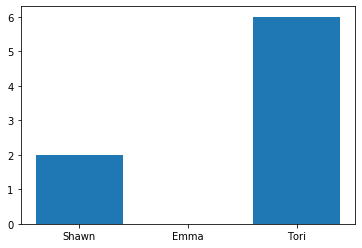

In [211]:
#comm_names = list(set(bgg.name) & set(hot_dataframe.Name))

shawn = 0
emma = 0
tori = 0

for i in shawn_dataframe.name:
    for j in hot_dataframe.Name:
        if i == j:
            shawn += 1   
            
for i in emma_dataframe.name:
    for j in hot_dataframe.Name:
        if i == j:
            emma += 1 
            
for i in tori_dataframe.name:
    for j in hot_dataframe.Name:
        if i == j:
            tori += 1
        
user_dict = {'Shawn': shawn, 'Emma': emma, 'Tori': tori}

plt.bar(range(len(user_dict)),user_dict.values())
plt.xticks(range(len(user_dict)), list(user_dict.keys()))
plt.show